In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import titlecase

sns.set_style('whitegrid')
pd.set_option('max_rows', 10)

In [2]:
df = pd.read_csv('Top2000_others.tsv', sep='\t')
df['Artist'] = df['Artist'].str.lower().apply(titlecase.titlecase)
df['Song'] = df['Song'].str.lower().apply(titlecase.titlecase)
display(df)

,Song,Artist,Nominator,Gender,Generation,Country
0,1/1,Brian Eno,Jeff Micklos,M,Millennial,US
1,(Sittin On) the Dock of the Bay,Otis Redding,Suus van Paridon,F,Millennial,NL
2,A Day in a Life,The Beatles,Debra Lightfeldt,F,Boomer,US
3,A Little Respect,Erasure,Alan Lightfeld,M,Millennial,US
4,Aan De Kust,Bløf,Peter van Paridon,M,Boomer,NL
...,...,...,...,...,...,...
505,You Want It Darker,Leonard Cohen,Jeroen van Paridon,M,Millennial,NL
506,Your Song,Elton John,Allison Lightfeldt,F,Millennial,US
507,Your Song,Elton John,Debra Lightfeldt,F,Boomer,US
508,Zeg Me Dat Het Niet Zo Is,Frank Boeijen Groep,Jeroen van Paridon,M,Millennial,NL


In [3]:
def count_votes(df, grouping):
    df = df.groupby(grouping).count().reset_index().drop(columns=['Gender', 'Generation', 'Country'])
    df = df.rename(columns={'Nominator': 'Votes'}).sample(frac=1)
    df = df.sort_values('Votes', ascending=False).reset_index(drop=True)
    return df

In [4]:
pd.set_option('max_rows', None)
df_song_votes = count_votes(df, ['Artist', 'Song'])
display(df_song_votes[df_song_votes['Votes'] > 1])

,Artist,Song,Votes
0,Queen,Bohemian Rhapsody,6
1,The Eagles,Hotel California,6
2,Led Zeppelin,Stairway to Heaven,5
3,Toto,Africa,5
4,Tracy Chapman,Fast Car,4
5,U2,Where the Streets Have No Name,3
6,Nina Simone,Feeling Good,3
7,Coldplay,Yellow,3
8,Dolly Parton,Jolene,3
9,Jeff Buckley,Hallelujah,3


In [5]:
display(df_song_votes.sort_values(['Artist', 'Song']))

,Artist,Song,Votes
62,10cc,Dreadlock Holiday,2
197,4 Non-Blondes,What’s Up?,1
34,A-Ha,Take on Me,2
110,Abba,Dancing Queen,1
143,Abba,Voulez-Vous,1
19,Adele,Make You Feel My Love,2
240,Adele,Rolling in the Deep,1
358,Adele,Someone Like You,1
72,Aerosmith,Dream On,2
114,Aerosmith,Sweet Emotion,1


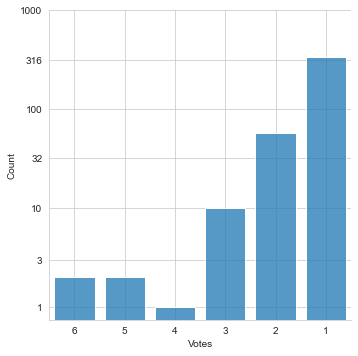

In [6]:
g = sns.displot(df_song_votes['Votes'], discrete=True, shrink=.8, log_scale=[0, 10])
g.set(xlim=[df_song_votes['Votes'].max() + .5, .5],
      xticks=np.arange(df_song_votes['Votes'].max(), 0, -1))
g.ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
g.ax.set_yticks((np.sqrt(10) ** np.arange(0, np.log(len(df)), 1)).round(0))
pass

In [7]:
df_artist_votes = count_votes(df, 'Artist').drop(columns=['Song'])
display(df_artist_votes[df_artist_votes['Votes'] > 1])

,Artist,Votes
0,Queen,13
1,The Rolling Stones,11
2,The Beatles,10
3,Elton John,9
4,Led Zeppelin,8
5,The Eagles,7
6,David Bowie,7
7,Radiohead,7
8,Pink Floyd,7
9,The Doors,6


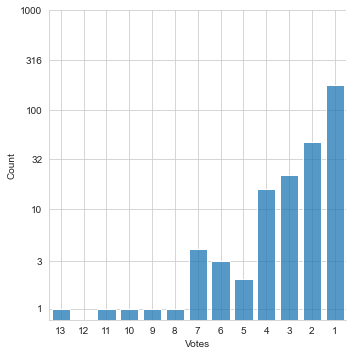

In [8]:
g = sns.displot(df_artist_votes['Votes'], discrete=True, shrink=.8, log_scale=[0, 10])
g.set(xlim=[df_artist_votes['Votes'].max() + .5, .5],
      xticks=np.arange(df_artist_votes['Votes'].max(), 0, -1))
g.ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
g.ax.set_yticks((np.sqrt(10) ** np.arange(0, np.log(len(df)), 1)).round(0))
pass

In [9]:
display(df_song_votes.head())
display(df_artist_votes.head())

,Artist,Song,Votes
0,Queen,Bohemian Rhapsody,6
1,The Eagles,Hotel California,6
2,Led Zeppelin,Stairway to Heaven,5
3,Toto,Africa,5
4,Tracy Chapman,Fast Car,4


,Artist,Votes
0,Queen,13
1,The Rolling Stones,11
2,The Beatles,10
3,Elton John,9
4,Led Zeppelin,8


In [12]:
df_combined_votes = df_song_votes.merge(
    df_artist_votes.rename(columns={'Votes': 'Artist votes'}),
    how='left', on='Artist'
)
display(df_combined_votes.sort_values(['Votes', 'Artist votes'], ascending=False).head(74))

,Artist,Song,Votes,Artist votes
0,Queen,Bohemian Rhapsody,6,13
1,The Eagles,Hotel California,6,7
2,Led Zeppelin,Stairway to Heaven,5,8
3,Toto,Africa,5,5
4,Tracy Chapman,Fast Car,4,4
5,U2,Where the Streets Have No Name,3,6
8,Dolly Parton,Jolene,3,4
11,Eric Clapton,Layla,3,4
12,Simon & Garfunkel,The Sound of Silence,3,4
13,Amy Winehouse,Back to Black,3,4


In [13]:
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

In [ ]:
name = 'Radiohead'

results = spotify.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print(artist['name'], artist['images'][0]['url'])